#### Importanto bibliotecas

In [43]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 
import re 
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

#### Verificação inicial do DF

In [27]:
df = pd.read_csv('train.csv')

df.head(10)

,AdiposeTissue,Density,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat,Age
0,29.99,1.03,189.16,65.77,40.77,106.51,100.49,100.41,NaN,38.16,24.01,35.91,NaN,**19.06,29.83,Idoso
1,26.98,1.04,"""167.69""**",69.18,38.5,101.43,100.06,96.11,56.18,36.65,21.99,29.69,"""26,24""",17.99,*27.12,Muito Idoso
2,*8.92//,1.08,160.07,69.04,36.79,97.32,83.62,98.51,58.72,35.33,22.63,30.14*,26.71,**17.58,"8,82",Jovem
3,34.57,1.02,229.37,NaN,/40.37,/114.93,115.82,"""112.13""",74.4**,NaN,24.03,36.11,31.82,18.79,34.4,Adulto
4,20.26,1.05,224.77,72.41,43.9,NaN,100.57//,106.63,**63.38,41.74,24.67,37.15,33.1,19.8,20.65,Adulto
5,26.66,1.04,161.35,NaN,35.13,NaN,94.27,100.11,NaN,35.87,"21,02",27.78,26.1,"""17.59""","26,42",Meia-Idade
6,21.19,1.05,210.37,NaN,38.97,NaN,94.65,107.7,65.94,"""""41,96""""",25.61,NaN,30.61,NaN,21.18,Jovem
7,***20.54,1.05,181.44,68.11,"""39.13""",100.19,NaN,102.62,/61.84,NaN,22.51,33.05,28.28,NaN,"/ /20,42",NaN
8,13.02,1.07,150.87,67.13,NaN,92.42,82.82,96.36,59.94,38.1/,"21,99","""31,56""",NaN,16.73,12.94,Adulto
9,25.3,1.04,198.85,74.21,NaN,105.32,NaN,/106.77,64.04,42.59,23.41,33.2//,30.01,18.41,24.97,Meia-Idade


In [28]:
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177000 entries, 0 to 176999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   AdiposeTissue  147831 non-null  object
 1   Density        158899 non-null  object
 2   Weight         162922 non-null  object
 3   Height         146827 non-null  object
 4   Neck           151861 non-null  object
 5   Chest          140791 non-null  object
 6   Abdomen        150852 non-null  object
 7   Hip            144818 non-null  object
 8   Thigh          147837 non-null  object
 9   Knee           148842 non-null  object
 10  Ankle          146835 non-null  object
 11  Biceps         144819 non-null  object
 12  Forearm        148843 non-null  object
 13  Wrist          155883 non-null  object
 14  BodyFat        177000 non-null  object
 15  Age            152867 non-null  object
dtypes: object(16)
memory usage: 21.6+ MB


#### Problemas encontrados:

 1. Dataframe sujo;
 2. Varias linhas com valores nulos;
 3. Idade como uma variavel categorica e nao numerica;
 4. Os dados da coluna Peso e Altura parecem estar errados ou trocados.

#### Limpando os dados

In [29]:
df_copy = df.copy()

# usando regex para limpar as colunas

colunas = df_copy.columns.tolist()
print (colunas)

for col in colunas:
    if col != 'Age':
        df_copy[col] = df_copy[col].astype(str).str.replace(',', '.')
        df_copy[col] = df_copy[col].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))
        df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')


df_copy.head(10)


['AdiposeTissue', 'Density', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'BodyFat', 'Age']


,AdiposeTissue,Density,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BodyFat,Age
0,29.99,1.03,189.16,65.77,40.77,106.51,100.49,100.41,NaN,38.16,24.01,35.91,NaN,19.06,29.83,Idoso
1,26.98,1.04,167.69,69.18,38.50,101.43,100.06,96.11,56.18,36.65,21.99,29.69,26.24,17.99,27.12,Muito Idoso
2,8.92,1.08,160.07,69.04,36.79,97.32,83.62,98.51,58.72,35.33,22.63,30.14,26.71,17.58,8.82,Jovem
3,34.57,1.02,229.37,NaN,40.37,114.93,115.82,112.13,74.40,NaN,24.03,36.11,31.82,18.79,34.40,Adulto
4,20.26,1.05,224.77,72.41,43.90,NaN,100.57,106.63,63.38,41.74,24.67,37.15,33.10,19.80,20.65,Adulto
5,26.66,1.04,161.35,NaN,35.13,NaN,94.27,100.11,NaN,35.87,21.02,27.78,26.10,17.59,26.42,Meia-Idade
6,21.19,1.05,210.37,NaN,38.97,NaN,94.65,107.70,65.94,41.96,25.61,NaN,30.61,NaN,21.18,Jovem
7,20.54,1.05,181.44,68.11,39.13,100.19,NaN,102.62,61.84,NaN,22.51,33.05,28.28,NaN,20.42,NaN
8,13.02,1.07,150.87,67.13,NaN,92.42,82.82,96.36,59.94,38.10,21.99,31.56,NaN,16.73,12.94,Adulto
9,25.30,1.04,198.85,74.21,NaN,105.32,NaN,106.77,64.04,42.59,23.41,33.20,30.01,18.41,24.97,Meia-Idade


#### Lidando com os valores nulos

In [30]:
# verificar o % de valores nulos por coluna
total = df_copy.isnull().sum().sort_values(ascending=False)
percent = (df_copy.isnull().sum()/len(df_copy)*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Chest,36209,20.457062
Hip,32182,18.181921
Biceps,32181,18.181356
Height,30173,17.046893
Ankle,30165,17.042373
AdiposeTissue,29169,16.479661
Thigh,29163,16.476271
Knee,28158,15.908475
Forearm,28157,15.907910
Abdomen,26148,14.772881


In [31]:
# nulos no meu resultado
# Se tiver nulos na coluna bodyfat, essa linha precisaria ser desconsiderada no treinamento 

target_null = df_copy['BodyFat'].isnull().sum()
print(f"Nulos no alvo (BodyFat): {target_null}")

Nulos no alvo (BodyFat): 0


In [32]:
# vendo quantidade de nulos por linha

null_in_line = df_copy.isnull().sum(axis=1)

print(null_in_line.value_counts())

2    51286
1    39225
3    38221
4    27152
0    14079
5     4022
6     2010
7     1005
Name: count, dtype: int64


In [33]:
df_copy.shape

(177000, 16)

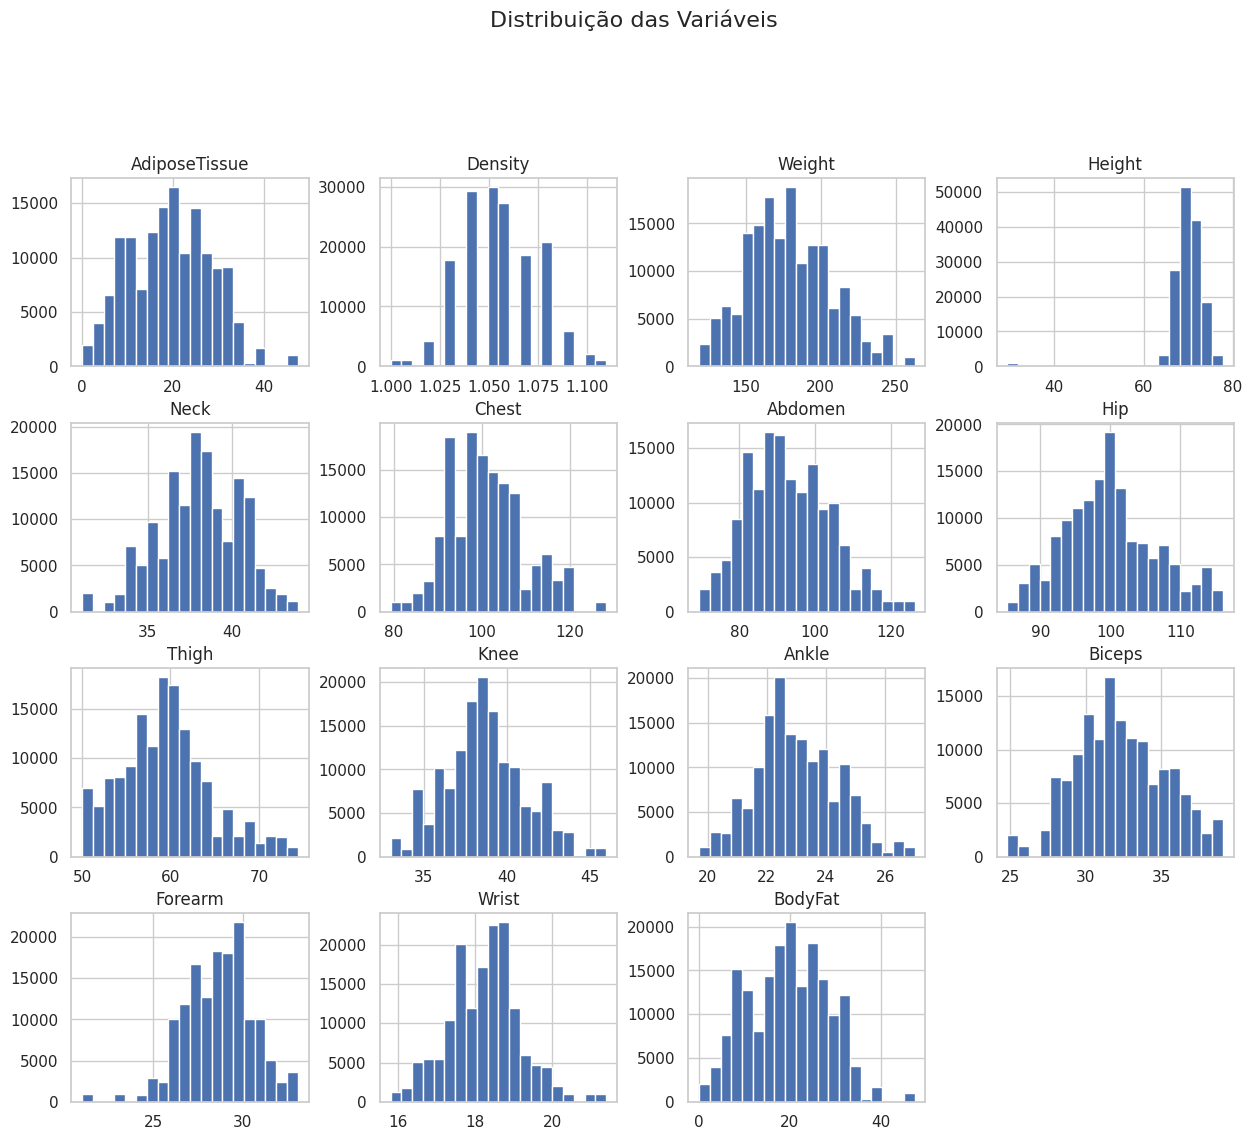

In [34]:
# verificar distribuição das variáveis numéricas sem tratamento de valores nulos

sns.set(style="whitegrid")
df_copy.hist(bins=20, figsize=(15, 12))
plt.suptitle('Distribuição das Variáveis', y=1.02, size=16)
plt.show()

#### Analisando Coluna Age

In [35]:
df_copy['Age'].unique()

array(['Idoso', 'Muito Idoso', 'Jovem', 'Adulto', 'Meia-Idade', nan],
      dtype=object)

In [36]:
# tratamento dos valores nulos em Age

df_copy['Age'] = df_copy['Age'].fillna('Desconhecido')
print(df_copy['Age'].value_counts())

percent_null = (df_copy['Age'] == 'Desconhecido').mean() * 100
print(f"Porcentagem de Age nulo: {percent_null:.2f}%")

Age
Adulto          85017
Meia-Idade      24602
Desconhecido    24133
Jovem           20598
Idoso           17622
Muito Idoso      5028
Name: count, dtype: int64
Porcentagem de Age nulo: 13.63%


In [37]:
# label encoding para preparar os dados para a amostragem estratificada

age_map = {
    'Desconhecido': 0,
    'Jovem': 1,
    'Adulto': 2,
    'Meia-Idade': 3,
    'Idoso': 4,
    'Muito Idoso': 5
}

df_copy['Age'] = df_copy['Age'].map(age_map)
print(df_copy['Age'].unique())

[4 5 1 2 3 0]


#### Amostragem Estratificada e Substituição de Valores Nulos por KNN

In [47]:
# preparar o codigo para a amostragem estratificada

df_resto, df_final= train_test_split(df_copy, test_size=0.2, random_state=42, stratify=df_copy['Age'])

In [50]:
print(df_final.shape)

(35400, 16)


In [48]:
# Substituir os valores nulos em Age por NaN para preparar os dados para o KNN
# O KNNImputer só identifica o que precisa ser preenchido se o valor for NaN

df_final['Age'] = df_final['Age'].replace(0, np.nan)


In [59]:
# Removendo a coluna alvo dos conjuntos de treino e teste.

X_final = df_final.drop(columns=['BodyFat'])

# Normalizar para atribuir os mesmos pesos a todas as variáveis

scaler = StandardScaler()
X_final_scaled = scaler.fit_transform(X_final)

# Aplicar o KNN imputer para preencher os valores nulos nas colunas numéricas

imputer = KNNImputer(n_neighbors=5)
X_final_imputed = imputer.fit_transform(X_final_scaled)

# Retornando para a escala original 
df_limpo = pd.DataFrame(scaler.inverse_transform(X_final_imputed), 
                        columns=X_final.columns, 
                        index=X_final.index)

# Arredondar o resultado de Age e converter para int para voltar para a escala do label encoding original

df_limpo['Age'] = df_limpo['Age'].round().astype(int)

print(df_limpo['Age'].unique())


[1 2 4 3 5]


In [60]:
df_limpo.head(10)

,AdiposeTissue,Density,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Age
24524,12.240,1.070,178.320,70.270,37.680,99.618,90.716,99.030,60.23,39.18,23.198,31.70,28.420,18.600,1
9043,26.930,1.040,218.970,74.160,39.950,108.700,104.950,107.648,67.95,42.80,24.090,35.51,29.040,19.050,2
104835,4.220,1.090,184.096,73.950,38.080,100.720,82.350,99.690,62.79,38.32,23.820,35.83,31.150,18.210,2
162234,16.590,1.060,173.520,71.546,37.680,98.254,90.780,99.872,60.09,39.17,23.380,32.50,29.870,17.410,2
55091,34.140,1.020,228.650,71.464,40.350,114.850,116.210,111.830,74.35,42.58,23.960,36.10,31.760,18.810,2
176258,17.590,1.058,152.644,69.900,36.406,91.346,80.050,93.410,54.97,36.26,22.110,29.87,26.630,17.894,2
58196,21.400,1.050,209.174,71.320,39.410,107.602,97.670,108.760,66.09,41.38,23.720,36.96,31.578,18.790,2
68736,19.924,1.060,165.240,68.560,31.100,92.980,87.280,96.530,54.57,39.04,24.820,31.07,29.420,18.800,2
103751,27.320,1.040,216.530,74.480,40.210,115.390,104.250,108.980,63.67,40.31,23.190,36.71,31.000,18.940,2
125245,19.640,1.050,170.230,68.390,39.092,96.030,90.420,102.528,61.91,38.02,22.310,33.35,28.260,18.080,2


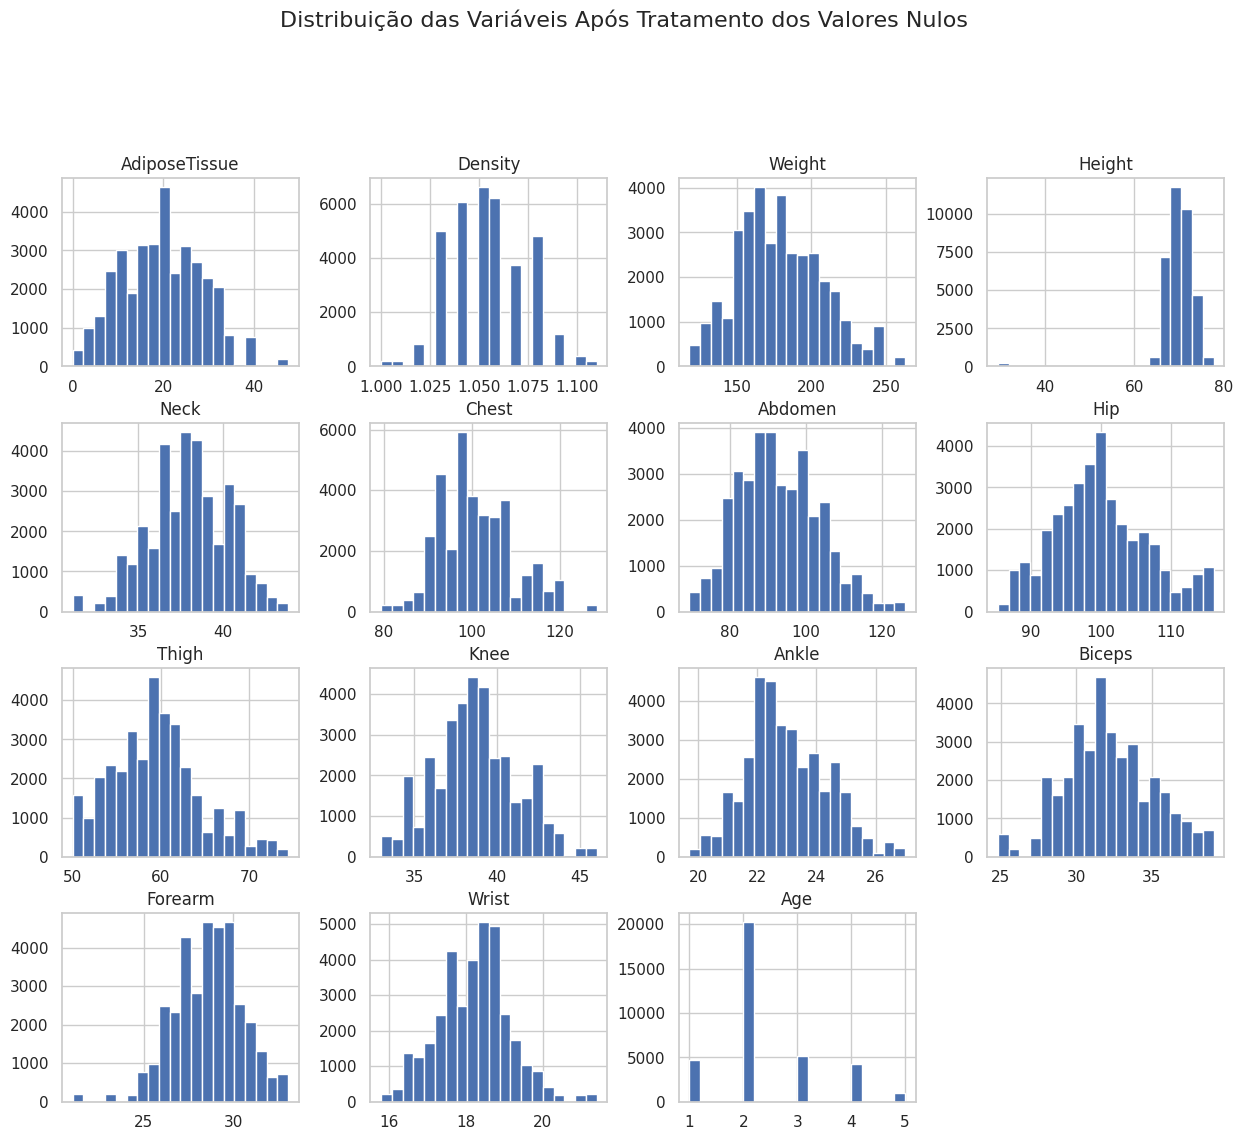

In [61]:
# Analisando a distribuição das variáveis após o tratamento dos valores nulos

sns.set(style="whitegrid")
df_limpo.hist(bins=20, figsize=(15, 12))
plt.suptitle('Distribuição das Variáveis Após Tratamento dos Valores Nulos', y=1.02, size=16)
plt.show()  